In [3]:
#/***************************************************************************
# *   Copyright (C) 2022 -- 2023 by Marek Sawerwain                         *
# *                                  <M.Sawerwain@gmail.com>                *
# *                                  <M.Sawerwain@issi.uz.zgora.pl>         *
# *                                                                         *
# *                              by Joanna Wiśniewska                       *
# *                                  <Joanna.Wisniewska@wat.edu.pl>         *
# *                                                                         *
# *   Part of the Quantum Distance Classifier:                              *
# *         https://github.com/qMSUZ/QDCLIB                                 *
# *                                                                         *
# *   Licensed under the EUPL-1.2-or-later, see LICENSE file.               *
# *                                                                         *
# *   Licensed under the EUPL, Version 1.2 or - as soon they will be        *
# *   approved by the European Commission - subsequent versions of the      *
# *   EUPL (the "Licence");                                                 *
# *                                                                         *
# *   You may not use this work except in compliance with the Licence.      *
# *   You may obtain a copy of the Licence at:                              *
# *                                                                         *
# *   https://joinup.ec.europa.eu/software/page/eupl                        *
# *                                                                         *
# *   Unless required by applicable law or agreed to in writing,            *
# *   software distributed under the Licence is distributed on an           *
# *   "AS IS" basis, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND,          *
# *   either express or implied. See the Licence for the specific           *
# *   language governing permissions and limitations under the Licence.     *
# *                                                                         *
# ***************************************************************************/

In [5]:
import matplotlib.pyplot as plt
import numpy as np

import qdclib as qdcl

# Example No. 1

Create several (denoted by _n_samples) normalized points on a unit circle. Data can be regared as qubits if both probability  amplitudes are real. To create clusters, we use modified spherical variant of the kmeans algorithm.    

In [26]:
_n_samples = 10

np.random.seed( 1234 )

d = qdcl.create_spherical_probes(_n_samples, 2)
    
print("Norms of each point in d:")
print(" " * 4,np.linalg.norm(d, axis=1))

Norms of each point in d:
     [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Scatter plot of 2D data 


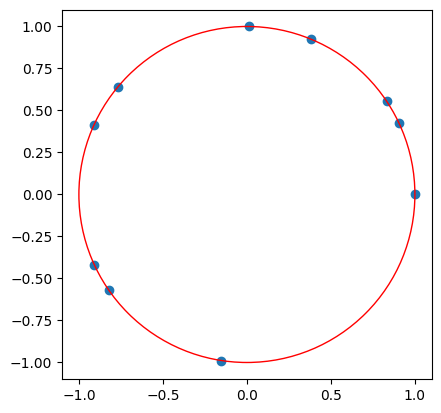

In [29]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
circle = plt.Circle( (0,0), 1,  color='r', fill=False)
ax.scatter( d[:,0], d[:,1])
ax.add_patch(circle)

n_clusters = 4
labels, centers = qdcl.kmeans_quantum_states( d, n_clusters, _func_distance=qdcl.COSINE_DISTANCE )
# labels, centers = qdcl.kmeans_quantum_states( d, n_clusters, _func_distance=qdcl.MANHATTAN_DISTANCE )
# labels, centers = qdcl.kmeans_quantum_states( d, n_clusters, _func_distance=qdcl.DOT_DISTANCE )
# labels, centers = qdcl.kmeans_quantum_states( d, n_clusters, _func_distance=qdcl.FIDELITY_DISTANCE )
# labels, centers = qdcl.kmeans_quantum_states( d, n_clusters, _func_distance=qdcl.TRACE_DISTANCE )


Scatter plot of 2D data with centers


In [30]:
print("Norms of each point in centers:")
print(" " * 4,np.linalg.norm(centers, axis=1))

Norms of each point in centers:
     [1. 1. 1. 1.]



[[0.09219944 0.        ]
 [0.01306851 0.        ]
 [0.26598683 0.        ]
 [0.04712888 0.        ]
 [0.31046135 0.        ]
 [0.         1.        ]
 [0.00897492 2.        ]
 [0.00897492 2.        ]
 [0.0035975  3.        ]
 [0.0035975  3.        ]]


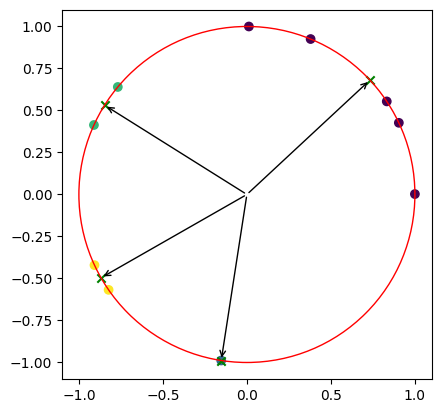

In [32]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
circle = plt.Circle( (0,0), 1,  color='r', fill=False)
ax.scatter( d[:,0], d[:,1], c=labels)
ax.scatter(centers[:, 0], centers[:, 1], marker='x', color='g')
for idx in range(n_clusters):
    ax.annotate("", xy=(centers[idx, 0], centers[idx, 1]), xytext=(0, 0), arrowprops=dict(arrowstyle="->"))
ax.add_patch(circle)

t = qdcl.create_distance_table( d, centers, labels, n_clusters, qdcl.cosine_distance )
print("")
print(t)

# Example No. 2

Similiar to the Example 1, but we create {_n_samples} with {_n_clusters} clusters. The applied API is also easier to use. To create clusters, we use modified spherical variant of the kmeans algorithm.

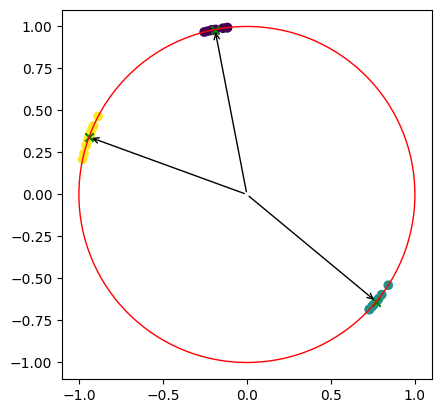

In [24]:
np.random.seed( 1234 )

_n_samples = 30
_n_clusters = 3

d = qdcl.create_focused_circle_probes(_n_samples, _n_clusters, _width_of_cluster=0.5)
labels, centers = qdcl.kmeans_quantum_states( d, _n_clusters, _func_distance=qdcl.COSINE_DISTANCE )

f=qdcl.create_circle_plot_with_centers_for_2d_data( d, _n_clusters, centers, labels )

# Example No. 3

Similiar to the Examples 1 and 2, but we create {_n_samples} with {_n_clusters} clusters. The applied API is also easier to use. To create clusters, we perform the kmedoids algorithm.

distance for cluster 0
[[0.0005376  0.        ]
 [0.00034604 0.        ]
 [0.00151506 0.        ]
 [0.00022233 0.        ]
 [0.00154441 0.        ]
 [0.00020358 0.        ]
 [0.         0.        ]
 [0.00279186 0.        ]]
distance for cluster 1
[[5.45571417e-04 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [1.37673041e-04 1.00000000e+00]
 [5.34225714e-04 1.00000000e+00]
 [2.57745431e-04 1.00000000e+00]
 [1.62486815e-04 1.00000000e+00]
 [1.16187142e-03 1.00000000e+00]
 [1.35802472e-04 1.00000000e+00]]
distance for cluster 2
[[6.32351823e-04 2.00000000e+00]
 [1.06977970e-05 2.00000000e+00]
 [2.22044605e-16 2.00000000e+00]
 [4.39619890e-04 2.00000000e+00]
 [2.04725923e-04 2.00000000e+00]
 [2.94312195e-04 2.00000000e+00]
 [6.33726913e-04 2.00000000e+00]
 [5.51454436e-05 2.00000000e+00]]
distance for cluster 3
[[7.99808492e-05 3.00000000e+00]
 [1.58529313e-03 3.00000000e+00]
 [1.42723318e-03 3.00000000e+00]
 [0.00000000e+00 3.00000000e+00]
 [1.59538867e-05 3.00000000e+00]
 [1.07539198

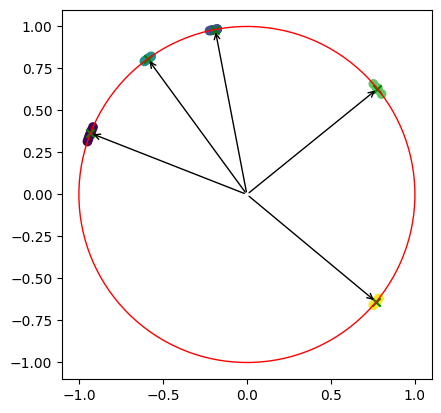

In [23]:
_n_samples = 40
_n_clusters = 5    

np.random.seed( 1234 )


d = qdcl.create_focused_circle_probes(_n_samples, _n_clusters, _width_of_cluster=0.175)
labels, centers = qdcl.kmedoids( d, _n_clusters, _max_iterations=128, _func_distance=qdcl.cosine_distance )

f=qdcl.create_circle_plot_with_centers_for_2d_data( d, _n_clusters, centers, labels )

dt = qdcl.create_distance_table(d, centers, labels, _n_clusters, _func_distance=qdcl.fidelity_as_distance)
for i in range( _n_clusters ):
    print( "Distance for cluster", i )
    print( qdcl.get_distances_for_cluster( dt, i ) )